## - To compare multiple files

In [1]:
%matplotlib notebook
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import numpy as np

ProblemDir = '/Users/ranchu/ToDownload/Chimera100ms_partProfile/'
CBIndex    = 'Frozen_CB_X48E40/100km/'
CBIndex2    = 'Frozen_CB_X48E40/run2_100km/'
BLIndex    = 'Frozen_BL_X48E40/100km/'
KSIndex    = 'Frozen_KS_X48E40/100km/'
LEIndex    = 'Frozen_LE_X48E40/100km/'
MIIndex    = 'Frozen_MI_X48E40/100km/'

filenamebase = 'deleptonizationwave_hdf5_chk_'
ClosureIndex = [CBIndex,CBIndex2,CBIndex2,CBIndex2]#BLIndex,KSIndex,LEIndex,MIIndex]
FileIndex    = [200,300,400,500]
LineType     = ['solid','dashdot', 'dashed','dotted','dashdot'] # linestyle='dashed'

fnum = len(FileIndex)
AverageEnergy = fnum * ['?']
AverageFluxFactor = fnum * ['?']
Luminosity = fnum * ['?']
NumberDensity = fnum * ['?']
EnergyDensity = fnum * ['?']
J = fnum * ['?']

for i in range(fnum):
    closure = ClosureIndex[i]
    fileindex = FileIndex[i]
    directory  = ProblemDir + closure    
    # ---
    fullfilename = directory + filenamebase + '{:04d}'.format(fileindex)
    print(fullfilename)
    
    [NumberDensity[i], EnergyDensity[i], AverageEnergy[i], J[i], ECenter, Radius] \
    = fycal.ReadMoment_Zeroth(fullfilename)
    [Luminosity[i], H1, ECenter_H, Radius] \
    = fycal.ReadMoment_First(fullfilename)
    AverageFluxFactor[i] \
    = np.true_divide(Luminosity[i],EnergyDensity[i])


/Users/ranchu/ToDownload/Chimera100ms_partProfile/Frozen_CB_X48E40/100km/deleptonizationwave_hdf5_chk_0200
/Users/ranchu/ToDownload/Chimera100ms_partProfile/Frozen_CB_X48E40/run2_100km/deleptonizationwave_hdf5_chk_0300
/Users/ranchu/ToDownload/Chimera100ms_partProfile/Frozen_CB_X48E40/run2_100km/deleptonizationwave_hdf5_chk_0400
/Users/ranchu/ToDownload/Chimera100ms_partProfile/Frozen_CB_X48E40/run2_100km/deleptonizationwave_hdf5_chk_0500


<IPython.core.display.Javascript object>


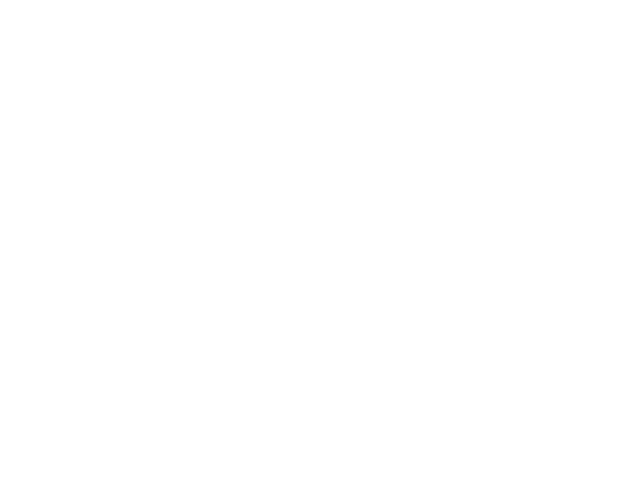

<IPython.core.display.Javascript object>


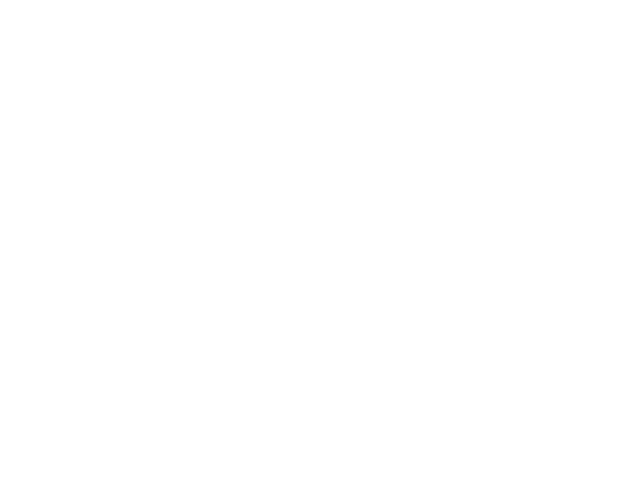

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

LineType     = ['solid','dashed','dashdot','dotted','dotted']
#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Average Energy [MeV]',color=color)
lns = 2*fnum * ['?']
for i in range(fnum):
    leg = ClosureIndex[i]#'Ave. Energy ' + ClosureIndex[i] + '{:04d}'.format(FileIndex[i])
    lns[i] = ax1.plot(Radius,AverageEnergy[i],linestyle=LineType[i],color=color,label=leg)

ax1.set_yscale('log')
ax1.set_xscale('log') 
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average. Flux Factor', color=color)
for i in range(fnum):
    leg =  ClosureIndex[i]+ '{:04d}'.format(FileIndex[i])#'Ave. Flux Factor ' + ClosureIndex[i] + '{:04d}'.format(FileIndex[i])
    lns[i+fnum] = ax2.plot(Radius, AverageFluxFactor[i],linestyle=LineType[i], color=color,label=leg)

ax2.set_yscale('linear')
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.legend(loc='right')
ax2.legend(loc='upper left')

plt.show()


fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Luminosity ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Luminosity [MeV^3]',color=color)
lns = 2*fnum * ['?']
for i in range(fnum):
    leg = ClosureIndex[i]+'{:04d}'.format(FileIndex[i])#'Ave. Energy ' + ClosureIndex[i] + '{:04d}'.format(FileIndex[i])
    lns[i] = ax1.plot(Radius,Luminosity[i],linestyle=LineType[i],color=color,label=leg)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='lower left')

plt.show()

<IPython.core.display.Javascript object>


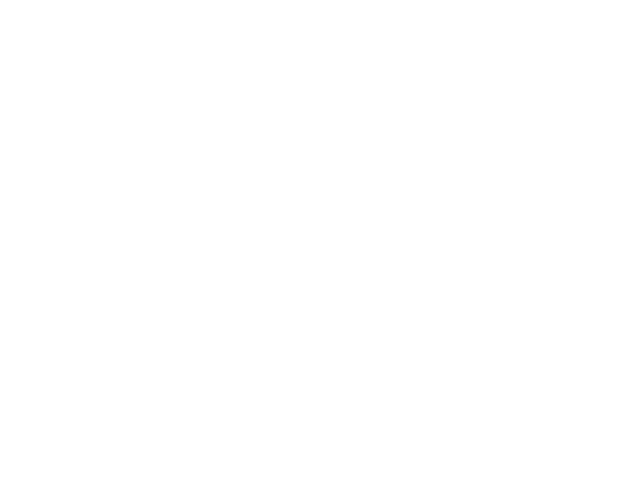

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- J ---
color = 'tab:red'
ax1.set_xlabel('Energy index')
ax1.set_ylabel('H1 at the innermost cell',color=color)
lns = 2*fnum * ['?']
energy3 = np.power(ECenter,3)
plotdata = np.multiply(H1[720],energy3)
ax1.plot(plotdata,color=color,label=leg)

ax1.set_yscale('linear')
ax1.set_xscale('linear') 
ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

<IPython.core.display.Javascript object>


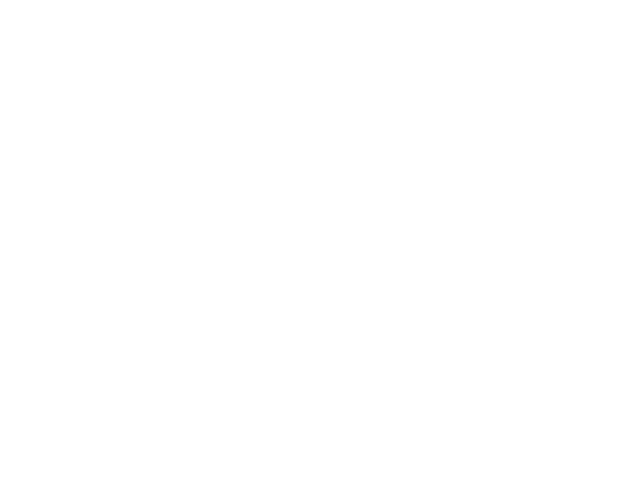

In [4]:
RelativeDiff_AverageEnergy= abs(AverageEnergy[1]-AverageEnergy[0])/AverageEnergy[0]
RelativeDiff_AverageFluxFactor= abs(AverageFluxFactor[1]-AverageFluxFactor[0])/abs(AverageFluxFactor[0])

import matplotlib.pyplot as plt

LineType     = ['solid','dashdot', 'dashed','dotted','dashdot']
#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Relative Diff. in Average Energy [MeV]',color=color)
lns = 2*fnum * ['?']
leg = 'ABS(MI - CB)/ABS(CB)'
lns[0] = ax1.plot(Radius,RelativeDiff_AverageEnergy,linestyle=LineType[0],color=color,label=leg)

ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Relative Diff. in Average. Flux Factor', color=color)
leg =  'ABS(MI - CB)/ABS(CB)'
lns[1] = ax2.plot(Radius, RelativeDiff_AverageFluxFactor,linestyle=LineType[1], color=color,label=leg)

ax2.set_yscale('log')    
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.legend(loc='upper left')
ax2.legend(loc='right')

plt.show()

## - To see the evolution of a sequence chk files

In [5]:
%matplotlib notebook
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import numpy as np

directory = '/Users/ranchu/ToDownload/Chimera100ms_X48E40_CB_Frozen/'
filenamebase = 'deleptonizationwave_hdf5_chk_'
fmin = 176
fmax = 176
fnum = fmax - fmin + 1
NumberDensity = fnum * ['?']
EnergyDensity = fnum * ['?']
Luminosity    = fnum * ['?']
AverageEnergy = fnum * ['?']
AverageFluxFactor = fnum * ['?']
FileIndex = range(fmin,fmax+1)
for i in range(fnum):
    fileindex = FileIndex[i]
    # ---
    fullfilename = directory + filenamebase + '{:04d}'.format(fileindex)
    print(fullfilename)
    [NumberDensity[i], EnergyDensity[i], AverageEnergy[i], J, ECenter, Radius] \
    = fycal.ReadMoment_Zeroth(fullfilename)
    [Luminosity[i],H1,ECenter, Radius] = fycal.ReadMoment_First(fullfilename)
    AverageFluxFactor[i] = np.true_divide(Luminosity[i],EnergyDensity[i])
    #fyplt.plt_1D_Eos(fullfilename,closure[0:2])
    #fyplt.plt_1D_NumberDensity(fullfilename)

/Users/ranchu/ToDownload/Chimera100ms_X48E40_CB_Frozen/deleptonizationwave_hdf5_chk_0176


<IPython.core.display.Javascript object>


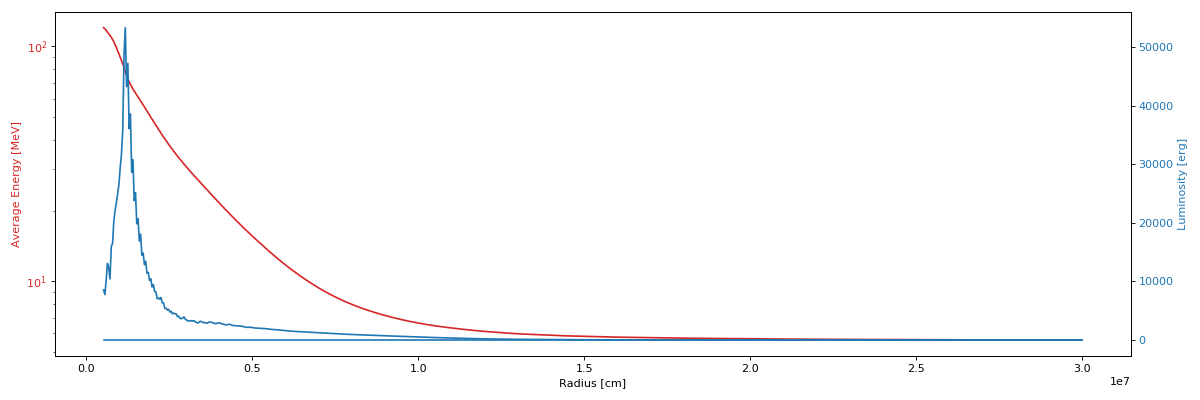

In [6]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Average Energy [MeV]', color=color)
for i in range(fnum):
    leg = 'Average Energy'+'{:04d}'.format(i)
    ax1.plot(Radius, AverageEnergy[i], color=color, label=leg)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
# --- Energy Density ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Luminosity [erg]', color=color)
for i in range(fnum):
    leg = 'Luminosity'+'{:04d}'.format(i)
    ax2.plot(Radius, Luminosity[i], color=color,label=leg)
    ax2.plot(Radius, AverageFluxFactor[i], color=color,label=leg)

if(np.min(Luminosity) <=0 ):
    ax2.set_yscale('linear')
else:
    ax2.set_yscale('log')
    
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')

plt.show()